# Lab | Multi-modal output agent

**Create another version of the prompts below to query the dall-e vision AI model following the example shown in this notebook.**

# Multi-modal outputs: Image & Text

This notebook shows how non-text producing tools can be used to create multi-modal agents.

This example is limited to text and image outputs and uses UUIDs to transfer content across tools and agents.

This example uses Steamship to generate and store generated images. Generated are auth protected by default.

You can get your Steamship api key here: https://steamship.com/account/api

In [1]:
!pip install steamship > /dev/null
!pip install langchainhub

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-openai 0.1.14 requires tiktoken<1,>=0.7, but you have tiktoken 0.4.0 which is incompatible.


In [2]:
import re

from IPython.display import Image, display
from steamship import Block, Steamship

In [3]:
!pip install langchain

In [4]:
!pip install langchain-openai

  Using cached tiktoken-0.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: tiktoken
    Found existing installation: tiktoken 0.4.0
    Uninstalling tiktoken-0.4.0:
      Successfully uninstalled tiktoken-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
steamship 2.17.34 requires tiktoken~=0.4.0, but you have tiktoken 0.7.0 which is incompatible.


In [5]:
!pip install langchain-community langchain-core

In [23]:
from langchain.agents import AgentType, initialize_agent
from langchain.agents import AgentExecutor, create_react_agent
from langchain_openai import OpenAI
from langchain import hub
from langchain.tools import SteamshipImageGenerationTool as OriginalSteamshipImageGenerationTool

In [24]:
import os
from google.colab import userdata

In [25]:
OPENAI_API_KEY  = userdata.get('IronAPI')
#HUGGINGFACEHUB_API_TOKEN = userdata.get('HuggingFace')
#PINECONE_API_KEY = userdata.get('Pinecone')
SERPAPI_API_KEY = userdata.get('Serp')
STEAMSHIP_API_KEY = userdata.get('Steamship')

In [10]:
#import os
#from dotenv import load_dotenv, find_dotenv
#_ = load_dotenv(find_dotenv())

#OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')
#STEAMSHIP_API_KEY = os.getenv('STEAMSHIP_API_KEY')

In [26]:
llm = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0)

## Dall-E

In [36]:
import steamship
from langchain.tools import SteamshipImageGenerationTool as OriginalSteamshipImageGenerationTool
client = steamship.Steamship(api_key=STEAMSHIP_API_KEY)

In [29]:
class SteamshipImageGenerationTool(OriginalSteamshipImageGenerationTool):
    pass
SteamshipImageGenerationTool.update_forward_refs()

In [30]:
tools = [SteamshipImageGenerationTool(steamship_api_key=STEAMSHIP_API_KEY, model_name="dall-e")]

In [31]:
mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

# prompt = hub.pull("hwchase17/react")
# agent = create_react_agent(llm=llm, tools=tools, prompt=prompt)
# agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [32]:
output = mrkl.invoke("How would you visualize a perfect world?")



> Entering new AgentExecutor chain...
 I should use an image generation tool to create an image that represents a perfect world.
Action: generate_image
Action Input: "A beautiful landscape with clear blue skies, lush green trees, and happy people living in harmony."
Observation: D6633B8A-292C-46E9-A8CC-B2A22DADFEBD
Thought: I should use the UUID to retrieve the generated image.
Action: retrieve_image
Action Input: D6633B8A-292C-46E9-A8CC-B2A22DADFEBD
Observation: retrieve_image is not a valid tool, try one of [generate_image].
Thought: I should use the UUID to retrieve the generated image.
Action: view_image
Action Input: D6633B8A-292C-46E9-A8CC-B2A22DADFEBD
Observation: view_image is not a valid tool, try one of [generate_image].
Thought: I should use the UUID to retrieve the generated image.
Action: download_image
Action Input: D6633B8A-292C-46E9-A8CC-B2A22DADFEBD
Observation: download_image is not a valid tool, try one of [generate_image].
Thought: I should use the UUID to retriev

In [37]:
from IPython.display import Image, display
import re

def show_output(output):
    UUID_PATTERN = re.compile(
        r"([0-9A-Za-z]{8}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{4}-[0-9A-Za-z]{12})"
    )
    outputs = UUID_PATTERN.split(output)
    outputs = [re.sub(r"^\W+", "", el) for el in outputs]

    for output in outputs:
        maybe_block_id = UUID_PATTERN.search(output)
        if maybe_block_id:
            block = steamship.Block.get(client, maybe_block_id.group())
            display(Image(block.raw()))
        else:
            print(output, end="\n\n")

In [38]:
output

{'input': 'How would you visualize a perfect world?',
 'output': 'A00E3F80-EFD1-4393-BDFA-9B98E4387DC8'}

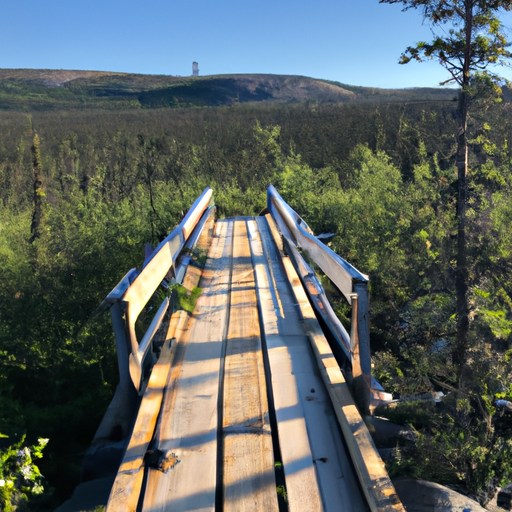

In [39]:
show_output(output=output['output'])

## StableDiffusion

In [41]:
tools = [SteamshipImageGenerationTool(steamship_api_key=STEAMSHIP_API_KEY, model_name="stable-diffusion")]

In [42]:
mrkl = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

In [44]:
output = mrkl.run("How would you visualize a perfect world?")



> Entering new AgentExecutor chain...
 I should use an image generation tool to create an image that represents a perfect world.
Action: generate_image
Action Input: "A beautiful landscape with clear blue skies, lush green trees, and happy people living in harmony."
Observation: 57F50C40-22C5-4944-AD99-CDDFA454F84A
Thought: I wonder if I can add any other elements to make the image more perfect.
Action: generate_image
Action Input: "In the center of the landscape, there is a magnificent castle with sparkling towers and a rainbow arching over it."
Observation: 94273D9E-397C-4E61-A01A-212F9BC43CCC
Thought: This image truly captures the essence of a perfect world.
Final Answer: The final answer is the UUID of the generated image, which is 94273D9E-397C-4E61-A01A-212F9BC43CCC.

> Finished chain.


In [45]:
output

'The final answer is the UUID of the generated image, which is 94273D9E-397C-4E61-A01A-212F9BC43CCC.'

The final answer is the UUID of the generated image, which is 



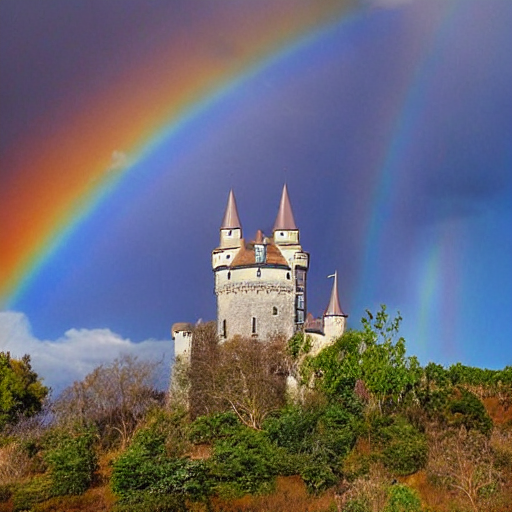

In [46]:
show_output(output=output)

In [47]:
output = mrkl.run("How would you visualize me?")



> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image based on the given text-2-image prompt.
Action: generate_image
Action Input: "A detailed text-2-image prompt describing an image"
Observation: 52004591-D0ED-4998-A2F8-FC70A7416A3E
Thought: I should use the UUID to access the generated image.
Action: Access generated image
Action Input: 52004591-D0ED-4998-A2F8-FC70A7416A3E
Observation: Access generated image is not a valid tool, try one of [generate_image].
Thought: I should use the generate_image tool again with a more specific text-2-image prompt.
Action: generate_image
Action Input: "A detailed text-2-image prompt describing a person with brown hair and blue eyes"
Observation: 258CCF95-30CD-4969-84FA-12682ECD7F51
Thought: I can now see the image that was generated.
Final Answer: The final answer is the UUID 258CCF95-30CD-4969-84FA-12682ECD7F51, which represents an image of a person with brown hair and blue eyes.

> Finished chain.


In [48]:
output

'The final answer is the UUID 258CCF95-30CD-4969-84FA-12682ECD7F51, which represents an image of a person with brown hair and blue eyes.'

The final answer is the UUID 



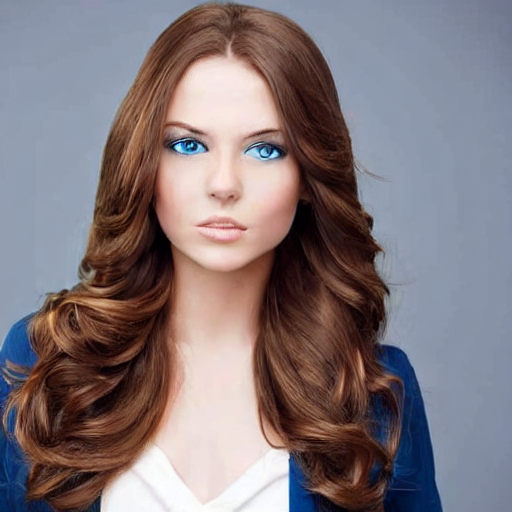

which represents an image of a person with brown hair and blue eyes.



In [49]:
show_output(output=output)

In [50]:
output = mrkl.run("How would you visualize yourself?")



> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image of myself.
Action: generate_image
Action Input: "A detailed text-2-image prompt describing an image of myself"
Observation: 5D25A54B-C161-497C-92F9-D1CA3875D444
Thought: I should use the UUID to access the generated image.
Action: access_image
Action Input: 5D25A54B-C161-497C-92F9-D1CA3875D444
Observation: access_image is not a valid tool, try one of [generate_image].
Thought: I should use the generate_image tool to create an image of myself.
Action: generate_image
Action Input: "A detailed text-2-image prompt describing an image of myself"
Observation: 56678E78-47AE-40F1-8618-3ADB9478DD51
Thought: I can now use the UUID to access the generated image of myself.
Final Answer: The final answer is the UUID 56678E78-47AE-40F1-8618-3ADB9478DD51.

> Finished chain.


In [51]:
output

'The final answer is the UUID 56678E78-47AE-40F1-8618-3ADB9478DD51.'

The final answer is the UUID 



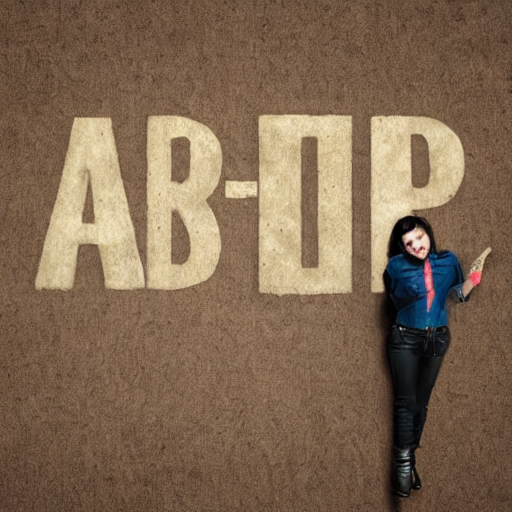

In [52]:
show_output(output=output)

In [59]:
output = mrkl.run("How would you visualize One Piece on the Laugh Tale island?")



> Entering new AgentExecutor chain...
 I should use the generate_image tool to create an image based on the prompt.
Action: generate_image
Action Input: "A detailed text-2-image prompt describing an image of One Piece on the Laugh Tale island."
Observation: 2761ECB3-501D-465C-A4B0-B4675FF93ABC
Thought: I should use the UUID to access the generated image.
Action: Access generated image
Action Input: 2761ECB3-501D-465C-A4B0-B4675FF93ABC
Observation: Access generated image is not a valid tool, try one of [generate_image].
Thought: I should use the generate_image tool to create an image based on the prompt.
Action: generate_image
Action Input: "A detailed text-2-image prompt describing an image of One Piece on the Laugh Tale island."
Observation: 8A491BFD-38E2-4ACA-AA3D-43FB88B9023E
Thought: I should use the UUID to access the generated image.
Action: Access generated image
Action Input: 8A491BFD-38E2-4ACA-AA3D-43FB88B9023E
Observation: Access generated image is not a valid tool, try one

In [60]:
output

'The final answer is the UUID F2AA735F-E811-42E0-B1D9-C3EBC3313554, which can be used to access the generated image of One Piece on the Laugh Tale island.'

The final answer is the UUID 



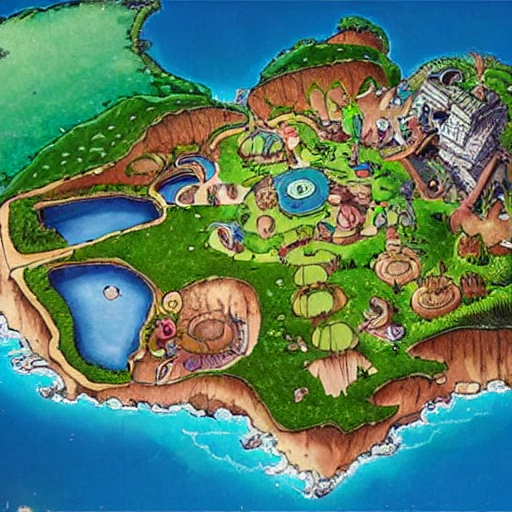

which can be used to access the generated image of One Piece on the Laugh Tale island.



In [61]:
show_output(output=output)